# Offline comparison of KF3 and KF4 algorithms (P convergence)
This uses a downloaded binary IBG datalog as input data. In this example, the vario is using a MS5611 barometric sensor. The code is executed in an Ubuntu 20.04 console terminal.

In `config.h` choose the algorithm to run and set `LOG_CONVERGENCE` to 1. 

E.g. if you want to check the KF3 algorithm convergence, 
```
// choose one of the following tests
// print the kalman filter P convergence over first 512 samples of data
#define LOG_CONVERGENCE    1
// print the baro sensor derived altitude cm, and kalman filter estimates for z and v, for all samples
#define LOG_INPUT_OUTPUT   0

// choose one of the following algorithms  
// for LOG_CONVERGENCE run, only KF3 and KF4 are valid
#define USE_KF2 0
#define USE_KF3 1
#define USE_KF4 0
```
Build the code :
```
g++ -o kf_compare kf_compare.cpp kalmanfilter2.cpp kalmanfilter3.cpp kalmanfilter4.cpp imu.cpp ringbuf.cpp -lm
```
Generate the results :
```
./kf_compare ./ms5611_datalog > kf3_ms5611_convergence.txt
```    

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
z_kf3 = []
Pzz_kf3 = []
v_kf3 = []
Pvv_kf3 = []
with open('kf3_ms5611_convergence.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    line = 0
    for row in csvreader:
        line = line+1
        # first two lines have log documentation
        if line > 2:
            z_kf3.append(float(row[0]))
            Pzz_kf3.append(float(row[1]))
            v_kf3.append(float(row[2]))
            Pvv_kf3.append(float(row[3]))
z_kf3 = np.array(z_kf3)        
Pzz_kf3 = np.array(Pzz_kf3)
v_kf3 = np.array(v_kf3)        
Pvv_kf3 = np.array(Pvv_kf3)

In [3]:
z_kf4 = []
Pzz_kf4 = []
v_kf4 = []
Pvv_kf4 = []
with open('kf4_ms5611_convergence.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    line = 0
    for row in csvreader:
        line = line+1
        # first two lines have log documentation
        if line > 2:
            z_kf4.append(float(row[0]))
            Pzz_kf4.append(float(row[1]))
            v_kf4.append(float(row[2]))
            Pvv_kf4.append(float(row[3]))
z_kf4 = np.array(z_kf4)        
Pzz_kf4 = np.array(Pzz_kf4)
v_kf4 = np.array(v_kf4)        
Pvv_kf4 = np.array(Pvv_kf4)

## Pzz convergence
Plot altitude uncertainty convergence for the first 512 samples

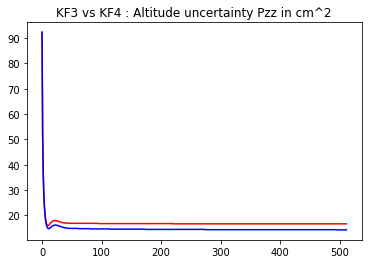

In [4]:
plt.plot(Pzz_kf3, color='red')
plt.plot(Pzz_kf4, color='blue')
plt.title('KF3 vs KF4 : Altitude uncertainty Pzz in cm^2')
plt.show()

Steep drop at start, so re-plot at starting offset 5 so that the difference in converged levels is clearer


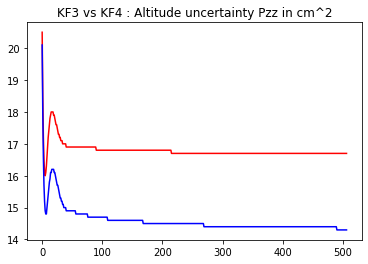

In [5]:
plt.plot(Pzz_kf3[5:512], color='red')
plt.plot(Pzz_kf4[5:512], color='blue')
plt.title('KF3 vs KF4 : Altitude uncertainty Pzz in cm^2')
plt.show()

## Pvv convergence
Plot climb/sink rate uncertainty convergence for first 512 samples

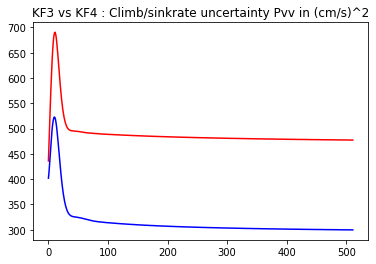

In [6]:
plt.plot(Pvv_kf3, color='red')
plt.plot(Pvv_kf4, color='blue')
plt.title('KF3 vs KF4 : Climb/sinkrate uncertainty Pvv in (cm/s)^2')
plt.show()